In [2]:
from obspy.core import Stream, read
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import pandas as pd

### Tohoku hypdist (6a)

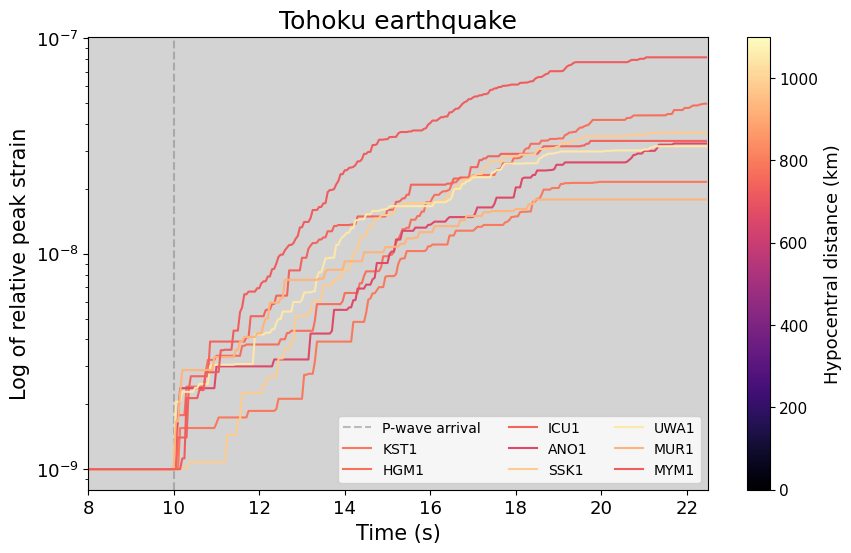

In [4]:
path = '/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/'
snr_array = pd.read_csv(path + 'stations_hypdists_snrs.list')

cmap = plt.get_cmap('magma', 1100) 

fig = plt.figure(figsize = (10,6), dpi = 100, facecolor = 'white', num = 1, clear = True)
ax = fig.add_subplot(111)

plot_p = True

for i in range(len(snr_array)):

    sta = snr_array['Station_name'][i]
    hypdist = float(snr_array['hyp_dist_km'][i])
    int_hypdist = int(hypdist)
    snr = float(snr_array['rms_snr'][i])

    # Peak strain data
    pst = read(path + 'filtered_peak_post_p/' + str(sta) + '.mseed')

    pst_times = pst[0].times()
    pst_data = pst[0].data
    samp_rate = pst[0].stats.sampling_rate

    low_xlim_sec = 8
    high_xlim_sec = 22.5

    low_xlim_samp = int(low_xlim_sec * samp_rate)
    high_xlim_samp = int(high_xlim_sec * samp_rate)

    # Move the flat line at the beginning of each timeseries to the same level

    norm_data = np.copy(pst_data)
    norm_level = pst_data[0]
    norm_data = norm_data - norm_level + 1*10**-9 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot

    # Plot stations
    ax.set_facecolor('lightgray')
    if plot_p:
        ax.axvline(x = 10, color = 'gray', linestyle = '--', alpha = 0.5, label = 'P-wave arrival')
        plot_p = False
    ax.plot(pst_times[low_xlim_samp:high_xlim_samp], norm_data[low_xlim_samp:high_xlim_samp], color = cmap(int_hypdist-1), label = sta)
    ax.set_yscale('log')
    ax.set_ylabel('Log of relative peak strain', fontsize = 15)
    ax.set_xlabel('Time (s)', fontsize = 15)
    ax.set_xlim(low_xlim_sec,high_xlim_sec)
    ax.tick_params(labelsize = 13)

ax.set_title('Tohoku earthquake', fontsize = 18)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm = Normalize(0, 1100), cmap = cmap), ax = ax)
cbar.ax.tick_params(labelsize = 11)
cbar.ax.set_ylabel(ylabel = 'Hypocentral distance (km)', fontsize = 13)
ax.legend(loc = 'lower right', ncol = 3, fontsize = 10)
    
plt.show();

# plt.savefig('/Users/sydneydybing/StrainProject/2024/Manuscript/Figures/Figure_6a.png', format = 'PNG')
# plt.close();


### Taiwan hypdist (6b and c)

2009-10-03_M6.1 - no data yet
2013-10-31_M6.3


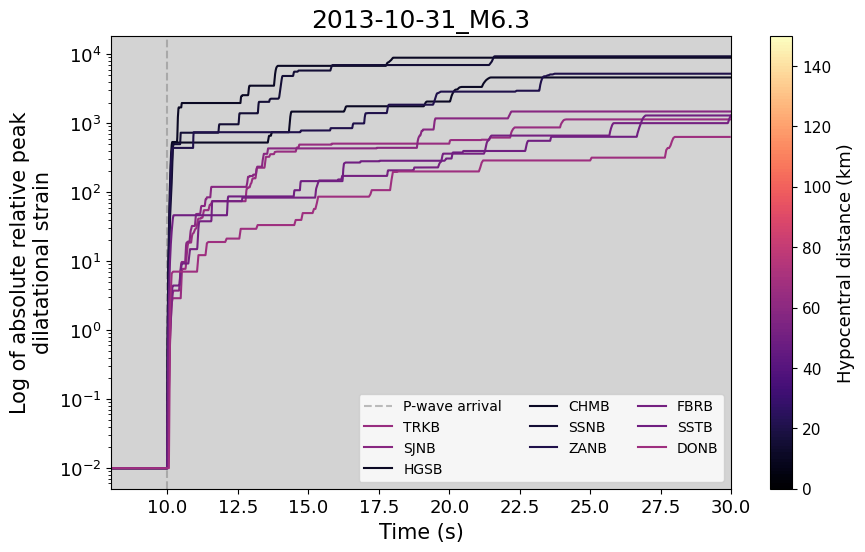

2018-02-04_M6.1


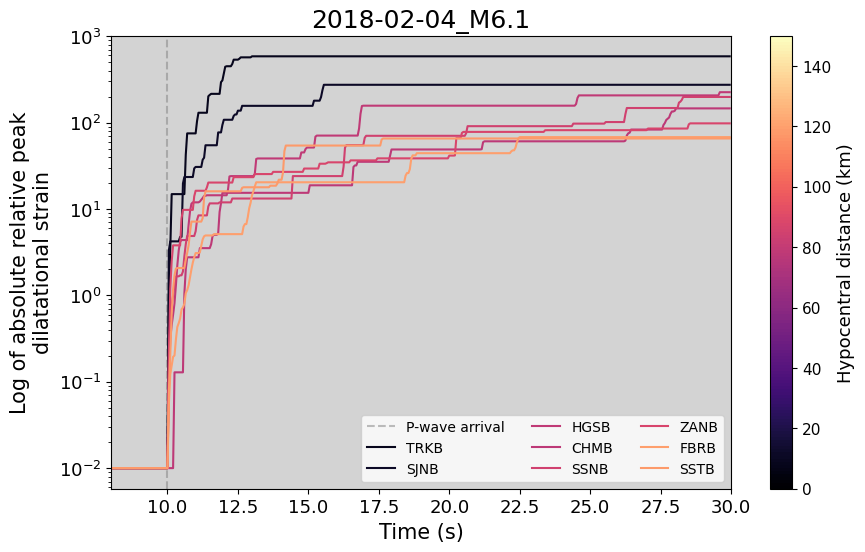

In [31]:
path = '/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/'
events = pd.read_csv(path + 'events_csv.csv')
snr_array = pd.read_csv(path + 'station_data_hypdists_snrs.csv')

cmap = plt.get_cmap('magma', 150) 

# For abs peak strain

for i in range(len(events)):
    
    evt_id = events['evt_id'][i]
    if evt_id == '2009-10-03_M6.1':
        print(evt_id + ' - no data yet')
        continue # don't know what the H1A data is yet
    print(evt_id)
    
    fig = plt.figure(figsize = (10,6), dpi = 100, facecolor = 'white', num = 1, clear = True)
    ax = fig.add_subplot(111)
    
    plot_p = True

    for idx in range(len(snr_array)):

        sta = snr_array['Sta'][idx]
        
        if evt_id == '2009-10-03_M6.1':
            hypdist = snr_array['2009_hyp_dist_km'][idx]
        elif evt_id == '2013-10-31_M6.3':
            hypdist = snr_array['2013_hyp_dist_km'][idx]
        elif evt_id == '2018-02-04_M6.1':
            hypdist = snr_array['2018_hyp_dist_km'][idx]
        
        int_hypdist = int(hypdist)
        # print(sta)

        # Strain data
        try:
            pst = read(path + 'filtered_abs_peak_post_p/' + evt_id + '/' + sta + '.mseed')
            # pst.plot()
            # apst = read(path + 'filtered_abs_peak_post_p/' + evt_id + '/' + sta + '.mseed')
        except:
            continue

        low_xlim_sec = 8
        high_xlim_sec = 30    
            
        # Peak strain data

        pst_times = pst[0].times()
        pst_data = pst[0].data
        samp_rate = pst[0].stats.sampling_rate
        low_xlim_samp = int(low_xlim_sec * samp_rate)
        high_xlim_samp = int(high_xlim_sec * samp_rate)

        # Move the flat line at the beginning of each timeseries to the same level

        norm_data = np.copy(pst_data)
        norm_level = pst_data[0]
    #         print(norm_level)
        norm_data = norm_data - norm_level + 1*10**-2 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot
        
        # Plot stations
        ax.set_facecolor('lightgray')
        if plot_p:
            ax.axvline(x = 10, color = 'gray', linestyle = '--', alpha = 0.5, label = 'P-wave arrival')
            plot_p = False
        ax.plot(pst_times[low_xlim_samp:high_xlim_samp], norm_data[low_xlim_samp:high_xlim_samp], color = cmap(int_hypdist-1), label = sta)
        ax.set_yscale('log')
        ax.set_ylabel('Log of absolute relative peak\ndilatational strain', fontsize = 15)
        ax.set_xlabel('Time (s)', fontsize = 15)
        ax.set_xlim(low_xlim_sec,high_xlim_sec)
        ax.tick_params(labelsize = 13)

    ax.set_title(evt_id, fontsize = 18)
    cbar = fig.colorbar(plt.cm.ScalarMappable(norm = Normalize(0, 150), cmap = cmap), ax = ax)
    cbar.ax.tick_params(labelsize = 11)
    cbar.ax.set_ylabel(ylabel = 'Hypocentral distance (km)', fontsize = 13)
    ax.legend(loc = 'lower right', ncol = 3, fontsize = 10)

    plt.show()
    
    # plt.savefig('/Users/sydneydybing/StrainProject/2024/Manuscript/Figures/Figure_6a.png', format = 'PNG')
    # plt.close();
